In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [3]:
feature_extractor = tf.keras.models.Sequential()

feature_extractor.add( tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


feature_extractor.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

feature_extractor.add( tf.keras.layers.Flatten())

feature_extractor.add( tf.keras.layers.Dense(units=256, activation='relu' ))
feature_extractor.add( tf.keras.layers.Dense(units=128, activation='relu' ))
feature_extractor.add(tf.keras.layers.Dense(units=1, activation='sigmoid' ))


In [6]:
feature_extractor.compile(optimizer='adam',
                  loss = 'binary_crossentropy', metrics = ['accuracy'])
#print(feature_extractor.summary()) 

In [7]:
#Train the CNN model
history = feature_extractor.fit(X_train, y_train, batch_size = 32, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
36/36 [==============================] - 15s 408ms/step - loss: 0.1227 - accuracy: 0.9626 - val_loss: 0.2058 - val_accuracy: 0.9320
Epoch 2/5
36/36 [==============================] - 15s 405ms/step - loss: 0.0730 - accuracy: 0.9757 - val_loss: 0.2662 - val_accuracy: 0.9061
Epoch 3/5
36/36 [==============================] - 15s 419ms/step - loss: 0.0467 - accuracy: 0.9878 - val_loss: 0.2331 - val_accuracy: 0.9482
Epoch 4/5
36/36 [==============================] - 15s 422ms/step - loss: 0.0347 - accuracy: 0.9904 - val_loss: 0.2785 - val_accuracy: 0.9482
Epoch 5/5
36/36 [==============================] - 16s 434ms/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 0.3367 - val_accuracy: 0.9353


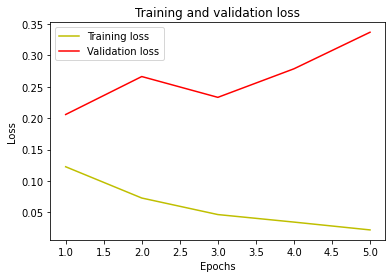

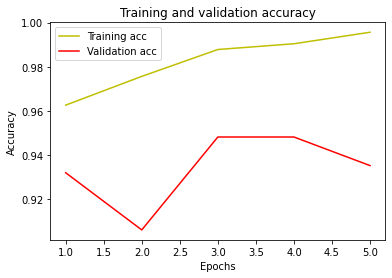

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
X_for_RF = feature_extractor.predict(X_train) 

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [10]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [11]:
X_test_feature = feature_extractor.predict(X_test) 
prediction_RF = RF_model.predict(X_test_feature)


In [12]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.9449838187702265


The prediction for this image is:  0
The actual label for this image is:  0


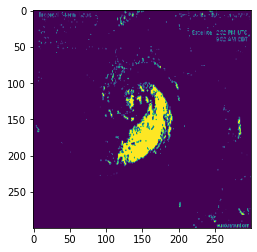

In [13]:
n = 166
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])

In [16]:
pickle_in = open("X_data.pickle","rb") 
X_data = pickle.load(pickle_in)

pickle_in = open("y_data.pickle","rb") 
y_data = pickle.load(pickle_in)

X_data = np.array(X_data/255.0) 
y_data = np.array(y_data)

from sklearn.model_selection import cross_val_score

X = feature_extractor.predict(X_data) 
accuracies = cross_val_score(RandomForestClassifier(n_estimators=40), X, y_data, cv=3)
accuracies.mean()

0.9739664754114522